In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("digit_pixels.csv")


In [7]:
data.shape

(42000, 785)

In [8]:
data .head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = data.iloc[:, 1:785]
y = data.iloc[:, 0]

In [13]:
x_train,x_val , y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=1212)

In [19]:
x_train.shape

(33600, 784)

In [20]:
y_train.shape

(33600,)

In [21]:
x_val.shape

(8400, 784)

In [22]:
y_val.shape

(8400,)

In [23]:
x_train_re = x_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_val_re = x_val.to_numpy().reshape(8400, 28, 28)
y_val_re = y_val.values

In [26]:
x_train_re.shape

(33600, 28, 28)

In [27]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

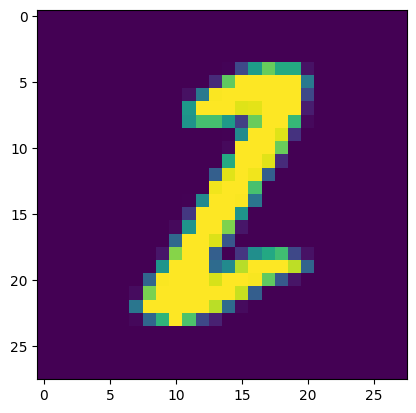

In [31]:
plt.imshow(x_train_re[0])
plt.show()